 <img src = excelrlogo.png/>

### ASSIGNMENT-13 -- KNN

#### PROBLEM STATEMENT -- glass

In [1]:
import numpy as np
import pandas as pd

In [2]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
glass.shape

(214, 10)

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [9]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [16]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


#### Splitting the variables

In [17]:
X=glass.iloc[:,0:9]
X1=glass.iloc[:,1:9]
Y=glass["Type"]

#### Standardization

In [18]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [19]:
X1["Na"]=MM.fit_transform(X1[["Na"]])
X1["Mg"]=MM.fit_transform(X1[["Mg"]])
X1["Al"]=MM.fit_transform(X1[["Al"]])
X1["Si"]=MM.fit_transform(X1[["Si"]])
X1["K"]=MM.fit_transform(X1[["K"]])
X1["Ca"]=MM.fit_transform(X1[["Ca"]])
X1["Ba"]=MM.fit_transform(X1[["Ba"]])
X1["Fe"]=MM.fit_transform(X1[["Fe"]])

#### FIT THE MODEL

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X1,Y)
Y_predict=KNN.predict(X1)

In [21]:
from sklearn.metrics import accuracy_score
as1=accuracy_score(Y,Y_predict)
print(as1)

0.7605633802816901


In [22]:
from sklearn.model_selection import KFold, cross_val_score
k=10
k_fold=KFold(n_splits=k, random_state=None)
cv_scores=cross_val_score(KNN, X1, Y, cv=k_fold)
mean_acc_score=sum(cv_scores)/len(cv_scores)

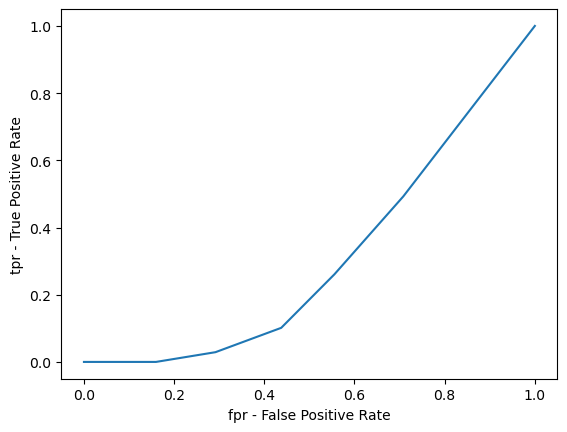

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
KNN.predict_proba(X1)[:,1]
fpr, tpr, threshold  = roc_curve(Y,KNN.predict_proba(X1)[:,1], pos_label=1)
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('tpr - True Positive Rate')
plt.xlabel('fpr - False Positive Rate')
plt.show()

In [24]:
aucvalue = roc_auc_score(Y,KNN.predict_proba(X1), multi_class='ovo')
print("aucvalue", aucvalue.round(3))

aucvalue 0.963


In [25]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()

In [26]:
X["RI"]=MM.fit_transform(X[["RI"]])
X["Na"]=MM.fit_transform(X[["Na"]])
X["Mg"]=MM.fit_transform(X[["Mg"]])
X["Al"]=MM.fit_transform(X[["Al"]])
X["Si"]=MM.fit_transform(X[["Si"]])
X["K"]=MM.fit_transform(X[["K"]])
X["Ca"]=MM.fit_transform(X[["Ca"]])
X["Ba"]=MM.fit_transform(X[["Ba"]])
X["Fe"]=MM.fit_transform(X[["Fe"]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X,Y)
Y_predict=KNN.predict(X)

In [28]:
from sklearn.metrics import accuracy_score
as2=accuracy_score(Y,Y_predict)
print(as2) 

0.7887323943661971


In [29]:
from sklearn.model_selection import KFold, cross_val_score
k=10
k_fold=KFold(n_splits=k, random_state=None)
cv_scores=cross_val_score(KNN, X, Y, cv=k_fold)
mean_acc_score=sum(cv_scores)/len(cv_scores)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
KNN.predict_proba(X)[:,1]
fpr, tpr, threshold  = roc_curve(Y,KNN.predict_proba(X)[:,1], pos_label=1)

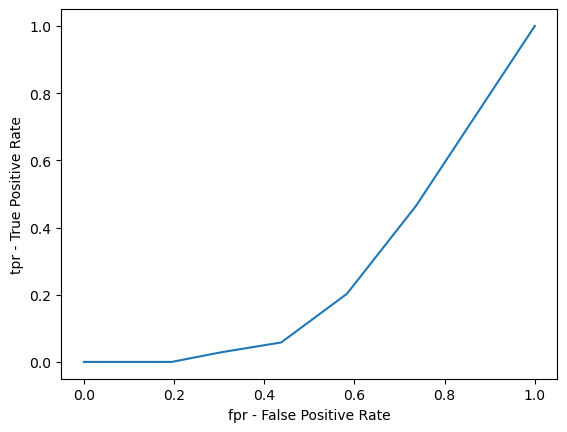

In [31]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.ylabel('tpr - True Positive Rate')
plt.xlabel('fpr - False Positive Rate')
plt.show()

In [32]:
aucvalue = roc_auc_score(Y,KNN.predict_proba(X), multi_class='ovo')
print("aucvalue", aucvalue.round(3))

aucvalue 0.969


### CONCLUSION

> The code successfully demonstrates the process of building and evaluating a KNN-based glass classification model. It includes data preprocessing, model training, evaluation, and performance visualization. The use of ROC curves and AUC scores indicates a comprehensive evaluation of the model's predictive capabilities. However, it's worth noting that model performance should be further assessed on unseen data (e.g., a test set) to ensure its generalizability. Additionally, hyperparameter tuning and other model selection techniques could be explored for potential performance improvement.

### Thank You!